<a href="https://colab.research.google.com/github/lidia-kojic/Data-Science-Projects/blob/main/HotelOperations_Optimization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
!pip install xgboost
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
hotel_df = pd.read_csv('Hotel.csv')
hotel_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
#  Check the dataset
hotel_df.shape

(36275, 19)

# Part 1: Data Preprocessing

## 1. Handle NaN Values

In [ ]:
# Check for NaN values in each column
columns_with_nan = hotel_df.isna().any()

In [ ]:
# Initialize a flag to indicate if NaN values are found
nan_found = False

# Print the columns with NaN values and the count of NaN values
for column, has_nan in columns_with_nan.items():
    if has_nan:
        nan_found = True
        print(f"Column '{column}' contains NaN values. Count: {data[column].isna().sum()}")
if not nan_found:
    print("No NaN values found in any column.")

No NaN values found in any column.


## 2. Handle Missing Values

In [ ]:
# Check for missing values in each column
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("No missing values found in any column.")
    else:
        print("Missing values found in the following columns:")
        print(missing_values)

# Call the function with the hotel dataframe
check_missing_values(hotel_df)


No missing values found in any column.


## 3. Encode Categorical Variables

In [ ]:
# Encode booking status
hotel_df['booking_status_numeric'] = hotel_df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_numeric
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,1


In [ ]:
# One-hot encode all others categorical variables
encode_hotel_df = pd.get_dummies(hotel_df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
encode_hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,0,0,0,0,0,1


# Part 2: Exploratory Data Analysis

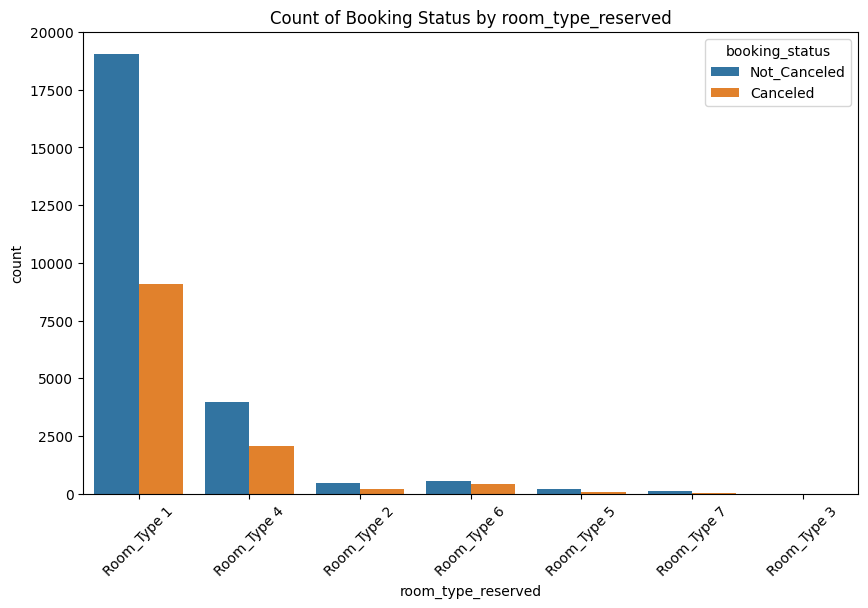

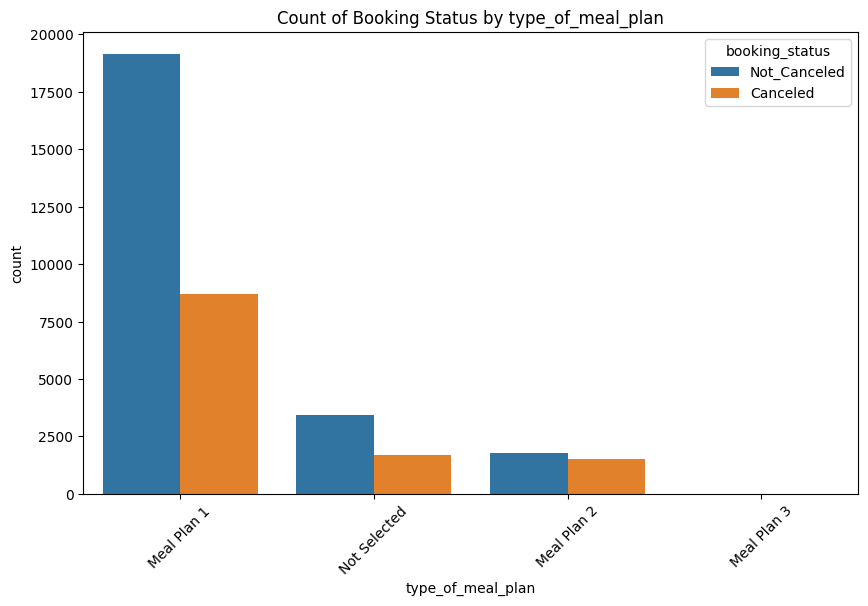

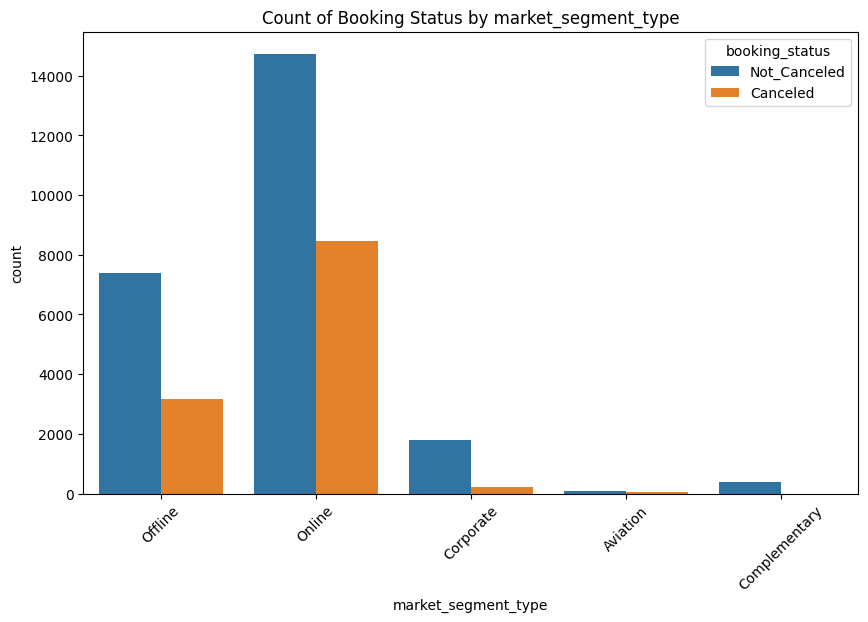

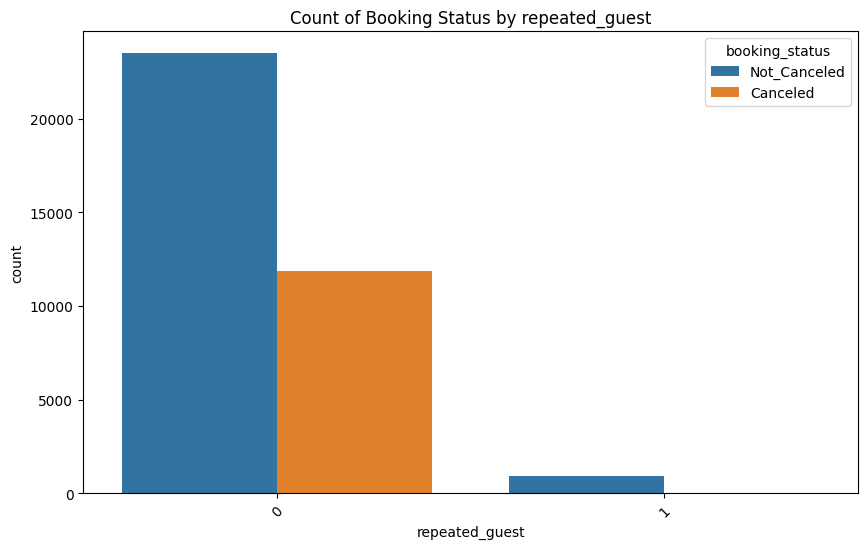

In [ ]:
# Bar graphs for all categorial variables
categorical_vars = ['room_type_reserved', 'type_of_meal_plan', 'market_segment_type', 'repeated_guest']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='booking_status', data=hotel_df)
    plt.title(f'Count of Booking Status by {var}')
    plt.xticks(rotation=45)
    plt.show()

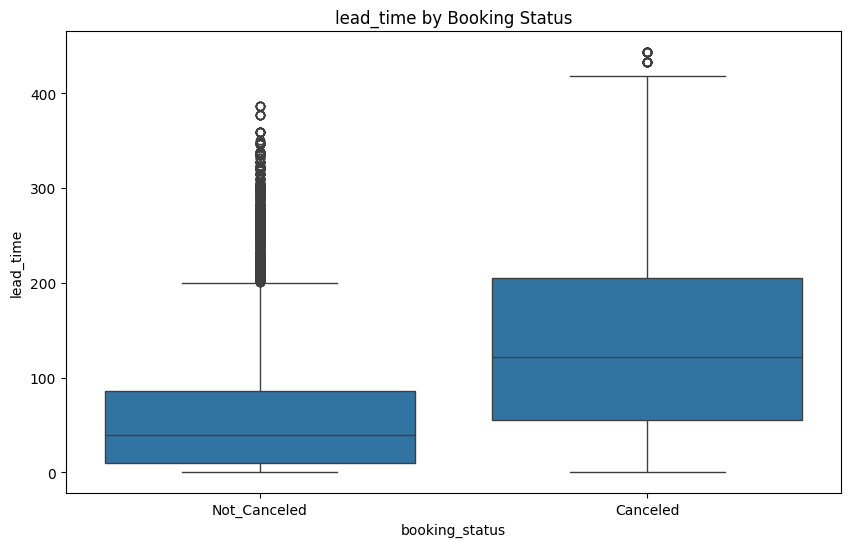

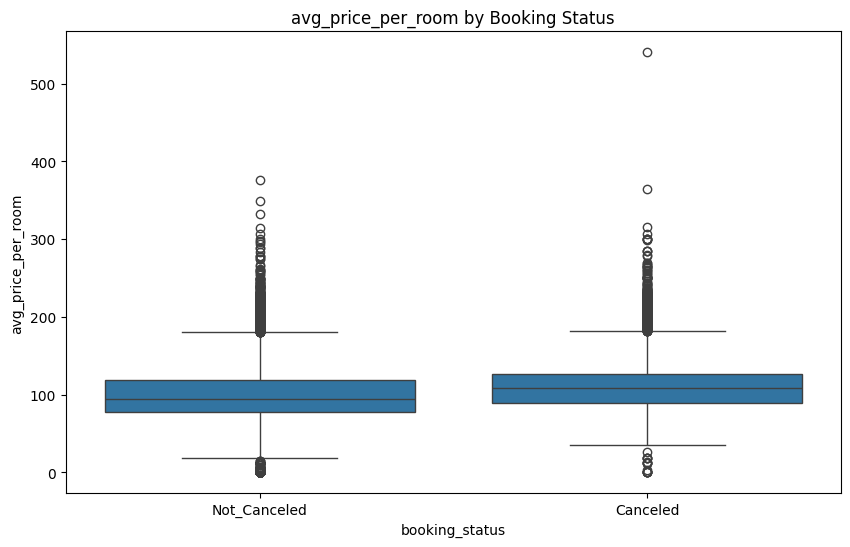

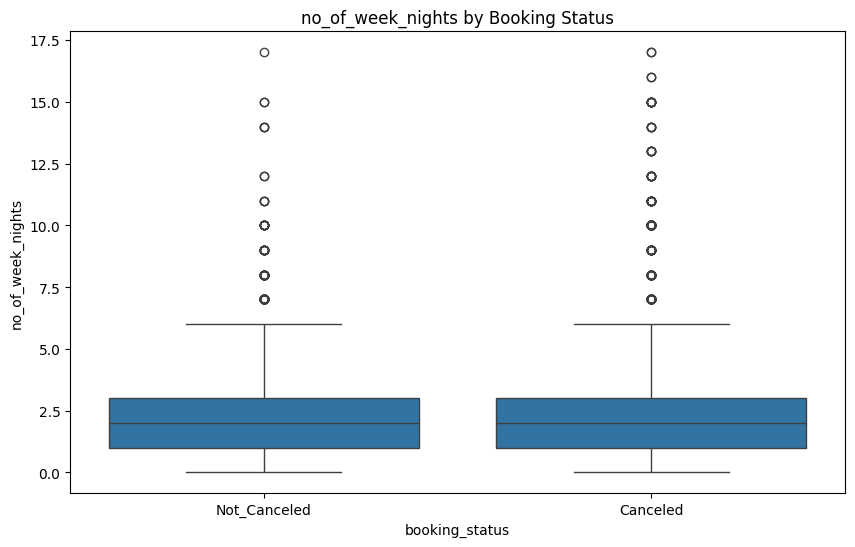

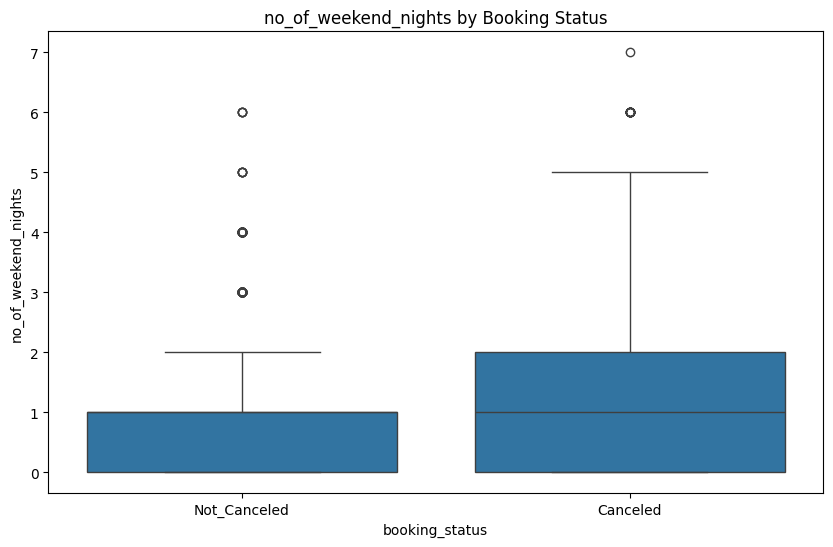

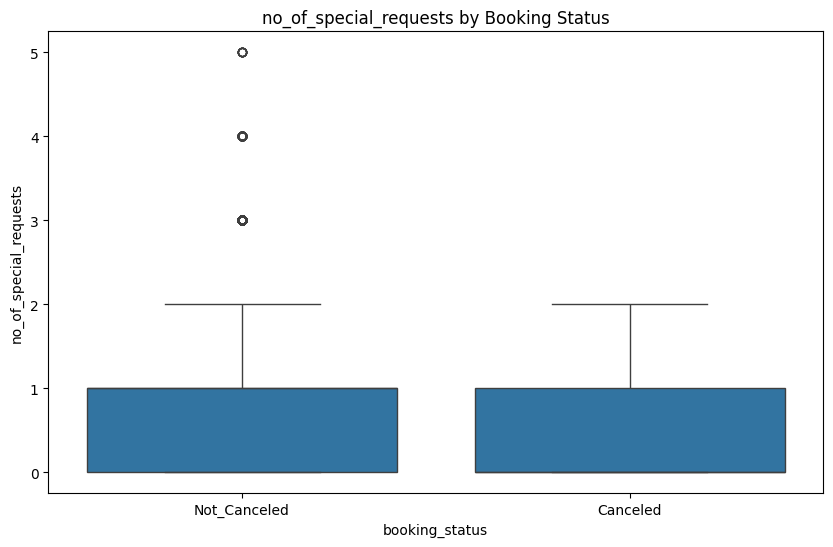

In [ ]:
# Boxplots for selected numerical variables
numerical_vars = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 'no_of_weekend_nights','no_of_special_requests']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='booking_status', y=var, data=hotel_df)
    plt.title(f'{var} by Booking Status')
    plt.show()

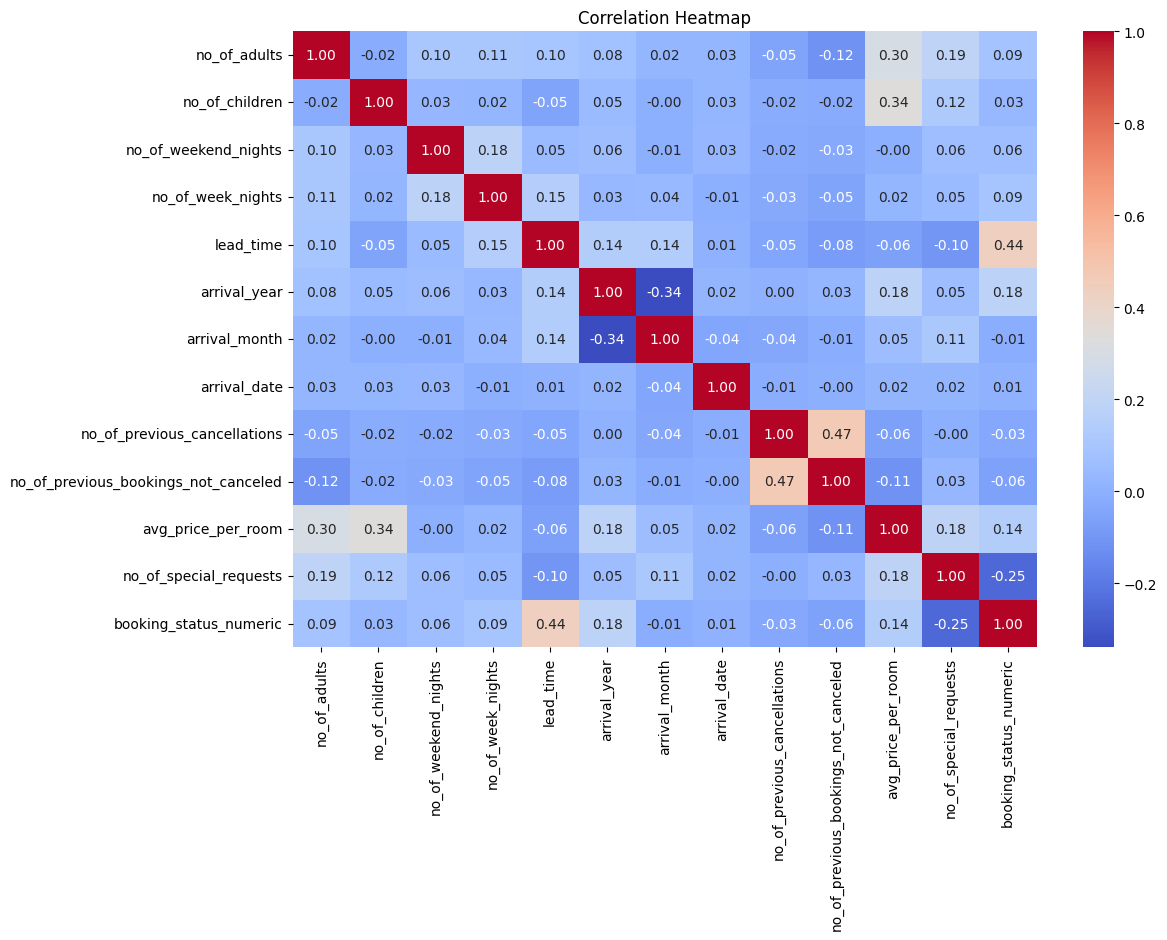

In [ ]:
#Correlation Analysis
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                  'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
                  'arrival_date', 'no_of_previous_cancellations',
                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                  'no_of_special_requests', 'booking_status_numeric']

# Calculate correlations
correlation_matrix = hotel_df[numerical_cols].corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Lead time is moderately correlated with booking status

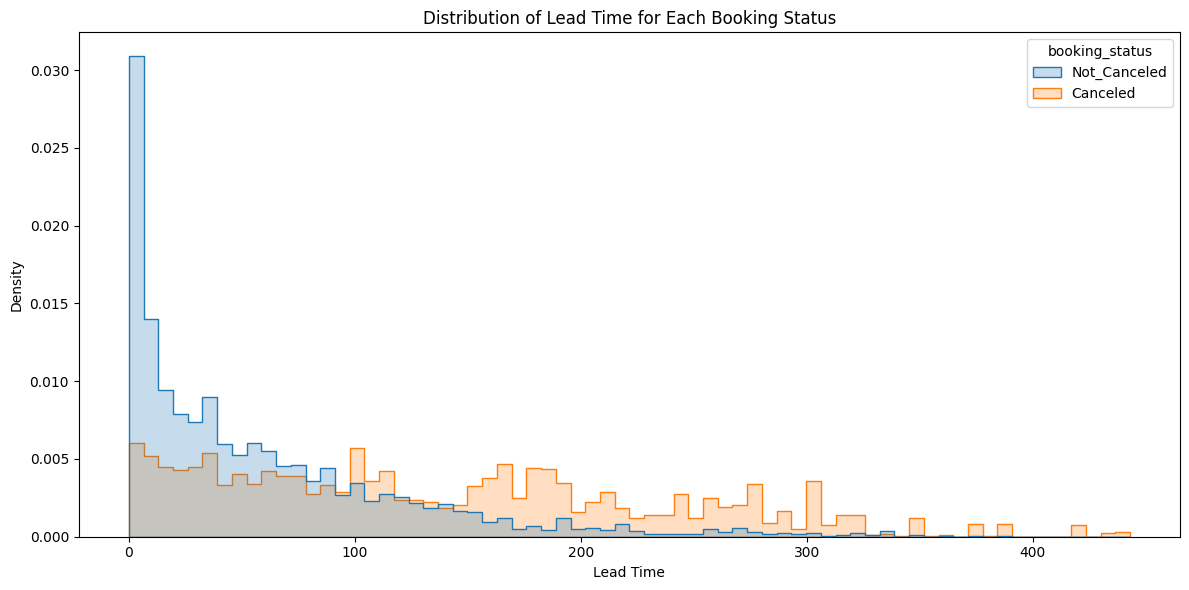

In [ ]:
# Lead time vs booking status
plt.figure(figsize=(12, 6))
# Ensure 'booking_status' is a column in 'hotel_df' that contains the category labels.
sns.histplot(data=hotel_df, x='lead_time', hue='booking_status', element='step', stat='density', common_norm=False)
plt.title('Distribution of Lead Time for Each Booking Status')
plt.xlabel('Lead Time')
plt.ylabel('Density')
# Remove the plt.legend() call if sns.histplot() is used with 'hue'.
plt.tight_layout()  # This will adjust the plot to accommodate the Seaborn-generated legend
plt.show()

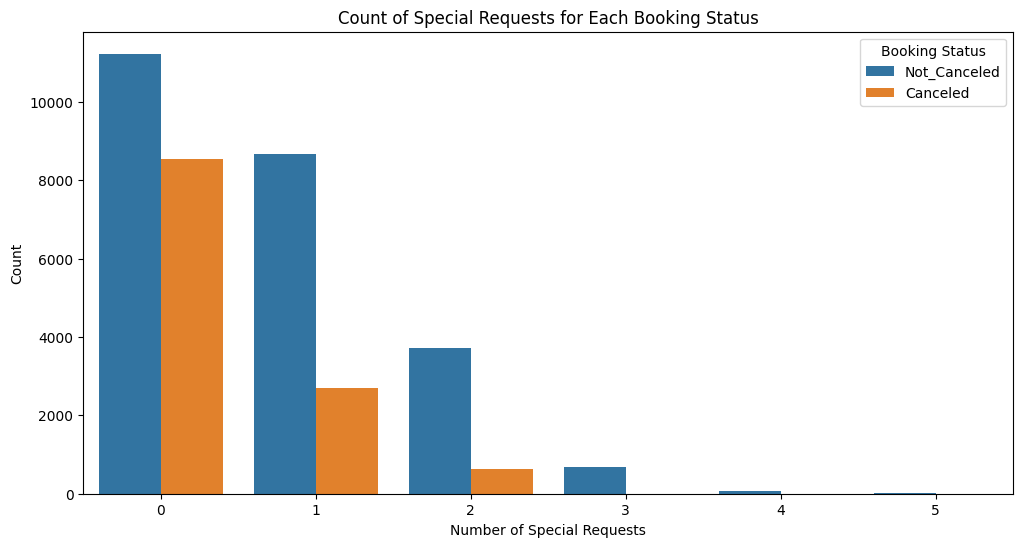

In [ ]:
# no.of request vs booking status
plt.figure(figsize=(12, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=hotel_df)
plt.title('Count of Special Requests for Each Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

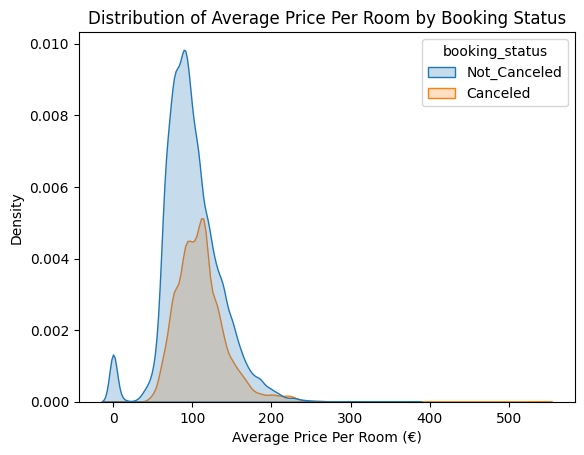

In [ ]:
# Price vs booking status
sns.kdeplot(data=hotel_df, x='avg_price_per_room', hue='booking_status', fill=True)
plt.title('Distribution of Average Price Per Room by Booking Status')
plt.xlabel('Average Price Per Room (€)')
plt.ylabel('Density')
plt.show()

# Part 4: Statistical Analysis

## 1. Numerical variables: Correlation

In [ ]:
# Calculating correlation
correlation_matrix = hotel_df[numerical_cols].corr()
# Filtering to show only correlations with 'booking_status_numeric'
booking_status_correlations = correlation_matrix['booking_status_numeric'].sort_values(ascending=False)
print(booking_status_correlations)

booking_status_numeric                  1.000000
lead_time                               0.438538
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
no_of_special_requests                 -0.253070
Name: booking_status_numeric, dtype: float64


The results suggest that lead_time has a higher corelation among all the variables - further lead time analysis.

In [ ]:
mean_lead = hotel_df.groupby('booking_status')['lead_time'].mean()
median_lead = hotel_df.groupby('booking_status')['lead_time'].median()

print("Mean Lead Time:\n", mean_lead)
print("\nMedian Lead time:\n", median_lead )

Mean Lead Time:
 booking_status
Canceled        139.215482
Not_Canceled     58.927224
Name: lead_time, dtype: float64

Median Lead time:
 booking_status
Canceled        122.0
Not_Canceled     39.0
Name: lead_time, dtype: float64


In [ ]:
# Logistic regression for lead time and booking status
# Add a constant to the independent variable
X = sm.add_constant(hotel_df['lead_time'])  # Adding a constant for the intercept
y = hotel_df['booking_status_numeric']

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Output summary results which include p-values
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.535918
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     booking_status_numeric   No. Observations:                36275
Model:                              Logit   Df Residuals:                    36273
Method:                               MLE   Df Model:                            1
Date:                    Sun, 31 Mar 2024   Pseudo R-squ.:                  0.1527
Time:                            22:12:12   Log-Likelihood:                -19440.
converged:                           True   LL-Null:                       -22944.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8049      0.019    -92.957      0.000      -1.843      -1.7

The results suggest that lead_time is a statistically significant predictor of the booking status, with a positive association with the likelihood of a booking being 'Not Cancelled'. However, the low pseudo R-squared value suggests that while lead_time may be significant, there are likely other important variables not included in the model that also affect the booking status.

## 2. Categorical Variables: Chi-Square Test of Independence

Investigating if any categorical variables are significantly associated with booking status.

In [ ]:
# Crosstab for chi-square test
roomType_chi2 = pd.crosstab(index=hotel_df['room_type_reserved'], columns=hotel_df['booking_status'])

# Chi-square test
roomType_chi2_stat, p, dof, ex = chi2_contingency(roomType_chi2)
print(f"Room Type Chi2 Stat: {roomType_chi2_stat}, P-value: {p}")

# Interpretation
alpha = 0.05
if p <= alpha:
    print('Room type and booking status are associated (reject H0)')
else:
    print('No association between room type and booking status (fail to reject H0)')

Room Type Chi2 Stat: 57.33495179790707, P-value: 1.5627796772447482e-10
Room type and booking status are associated (reject H0)


In [ ]:
# Crosstab for chi-square test
market_chi2_tab = pd.crosstab(index=hotel_df['market_segment_type'], columns=hotel_df['booking_status'])

# Chi-square test
market_chi2_stat, p, dof, ex = chi2_contingency(market_chi2_tab)
print(f"Market Segment Chi2 Stat: {market_chi2_stat}, P-value: {p}")

# Interpretation
alpha = 0.05
if p <= alpha:
    print('Market Segment and booking status are associated (reject H0)')
else:
    print('No association between Market Segment and booking status (fail to reject H0)')

Market Segment Chi2 Stat: 814.108865240557, P-value: 6.748763024557236e-175
Market Segment and booking status are associated (reject H0)


In [ ]:
# Crosstab for chi-square test
meal_chi2_tab = pd.crosstab(index=hotel_df['type_of_meal_plan'], columns=hotel_df['booking_status'])

# Chi-square test
meal_chi2_stat, p, dof, ex = chi2_contingency(meal_chi2_tab)
print(f"Meal Plan Chi2 Stat: {meal_chi2_stat}, P-value: {p}")

# Interpretation
alpha = 0.05
if p <= alpha:
    print('Meal Plan and booking status are associated (reject H0)')
else:
    print('No association between Market Segment and booking status (fail to reject H0)')

Meal Plan Chi2 Stat: 278.29490920586017, P-value: 4.951915406087789e-60
Meal Plan and booking status are associated (reject H0)


# 3. Machine Learning for booking_status prediction

## 3.1 Data Engineering

Features 'Booking_ID' and 'booking_status' are assumed to be not useful for the prediction of whether hotel booking will be canceled or not.

In [ ]:
# Remove the 'Booking_ID' column from the DataFrame
complete_data = hotel_df.drop('Booking_ID', axis=1)
complete_data = complete_data.drop('booking_status', axis=1)
complete_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_numeric
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [ ]:
#Encoding categorical variables to numbers
le = LabelEncoder()
# complete_data['type_of_meal_plan','room_type_reserved','market_segment_type'] = le.fit_transform(complete_data['type_of_meal_plan','room_type_reserved','market_segment_type'])
complete_data['type_of_meal_plan'] = le.fit_transform(complete_data['type_of_meal_plan'])
complete_data['room_type_reserved'] = le.fit_transform(complete_data['room_type_reserved'])
complete_data['market_segment_type'] = le.fit_transform(complete_data['market_segment_type'])

## 3.2 Split Data into Training, Testing, and Validation Set

We will use 80% of our dataset as our training set and 20% as our test set.

In [ ]:
X = complete_data.drop('booking_status_numeric', axis=1)
y = complete_data['booking_status_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 3.2 Random Forest

We will perform a grid search to see if these hyperparameters are the best options with a a 10-fold cross-validation for a Random Forest classifier.

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=212)
# scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_rf = grid_search.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9066849480300417


## 3.3 XGB

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]}
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.8941764345464621


## 3.4 Logistic Regression

In [ ]:
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']}
# logreg = LogisticRegression()
# grid_search.fit(X_train, y_train)

# best_logreg_model = grid_search.best_estimator_

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']}
logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_logreg_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

Best parameters: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score: 0.801722949689869


## 3.5 Ensemble Model Combining the Random Forest, XGB, and Logistic Regression

In [ ]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb_model),
    ('logreg', best_logreg_model)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=212)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_poli...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('logreg',
                              LogisticRegression(C=10, max_iter=1000,
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy}")

Ensemble model accuracy: 0.9008959338387319


# 4. Booking Behavior Over Time

In [ ]:
date_df = hotel_df[['arrival_year', 'arrival_month', 'arrival_date', 'booking_status']]
date_df

,arrival_year,arrival_month,arrival_date,booking_status
0,2017,10,2,Not_Canceled
1,2018,11,6,Not_Canceled
2,2018,2,28,Canceled
3,2018,5,20,Canceled
4,2018,4,11,Canceled
...,...,...,...,...
36270,2018,8,3,Not_Canceled
36271,2018,10,17,Canceled
36272,2018,7,1,Not_Canceled
36273,2018,4,21,Canceled


In [ ]:
date_df['arrival_datetime'] = date_df['arrival_year'].astype(str) + '-' + date_df['arrival_month'].astype(str) + '-' + date_df['arrival_date'].astype(str)
date_df.head()

<ipython-input-35-750aea7ac9cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['arrival_datetime'] = date_df['arrival_year'].astype(str) + '-' + date_df['arrival_month'].astype(str) + '-' + date_df['arrival_date'].astype(str)


,arrival_year,arrival_month,arrival_date,booking_status,arrival_datetime
0,2017,10,2,Not_Canceled,2017-10-2
1,2018,11,6,Not_Canceled,2018-11-6
2,2018,2,28,Canceled,2018-2-28
3,2018,5,20,Canceled,2018-5-20
4,2018,4,11,Canceled,2018-4-11


In [ ]:
date_df['arrival_datetime'] = date_df['arrival_datetime'].replace('2018-2-29', '2018-2-28')
# 2018-2-29 isn't recognized by the line of code below, so it's replaced by 2018-2-28 (since we will aggregate based on month, the change won't contradict or affect the accuracy of the result).
date_df['arrival_datetime'] = pd.to_datetime(date_df['arrival_datetime'])
date_df

<ipython-input-36-2e774c11b83f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['arrival_datetime'] = date_df['arrival_datetime'].replace('2018-2-29', '2018-2-28')
<ipython-input-36-2e774c11b83f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['arrival_datetime'] = pd.to_datetime(date_df['arrival_datetime'])


,arrival_year,arrival_month,arrival_date,booking_status,arrival_datetime
0,2017,10,2,Not_Canceled,2017-10-02
1,2018,11,6,Not_Canceled,2018-11-06
2,2018,2,28,Canceled,2018-02-28
3,2018,5,20,Canceled,2018-05-20
4,2018,4,11,Canceled,2018-04-11
...,...,...,...,...,...
36270,2018,8,3,Not_Canceled,2018-08-03
36271,2018,10,17,Canceled,2018-10-17
36272,2018,7,1,Not_Canceled,2018-07-01
36273,2018,4,21,Canceled,2018-04-21


In [ ]:
min(date_df['arrival_datetime'])

Timestamp('2017-07-01 00:00:00')

In [ ]:
max(date_df['arrival_datetime'])

Timestamp('2018-12-31 00:00:00')

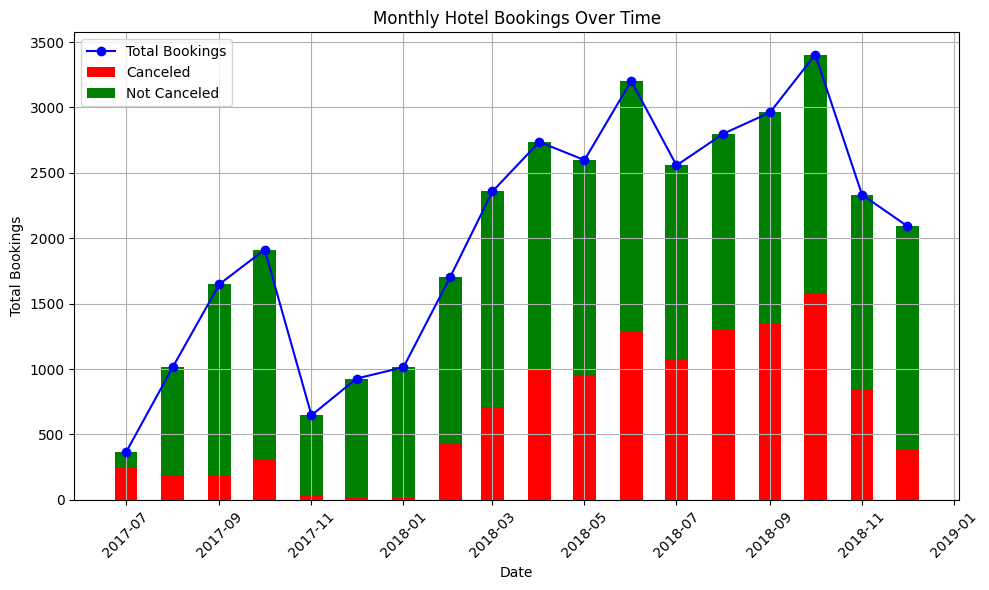

In [ ]:
# Aggregate data and convert Period to Timestamp
monthly_bookings = date_df.groupby(date_df['arrival_datetime'].dt.to_period('M')).size().reset_index(name='total_bookings')
monthly_bookings['arrival_datetime'] = monthly_bookings['arrival_datetime'].dt.to_timestamp()

monthly_bookings_status = date_df.groupby([date_df['arrival_datetime'].dt.to_period('M'), 'booking_status']).size().unstack(fill_value=0)
monthly_bookings_status.index = monthly_bookings_status.index.to_timestamp()

# Plot a combination chart of line for total bookings and stacked bars for booking status overtime
plt.figure(figsize=(10, 6))

plt.plot(monthly_bookings['arrival_datetime'], monthly_bookings['total_bookings'], marker='o', linestyle='-', color='blue', label='Total Bookings')

bar_width = 15
bar_positions = monthly_bookings_status.index

plt.bar(bar_positions, monthly_bookings_status['Canceled'], bar_width, label='Canceled', color='red')
plt.bar(bar_positions, monthly_bookings_status['Not_Canceled'], bar_width, label='Not Canceled', color='green', bottom=monthly_bookings_status['Canceled'])

plt.title('Monthly Hotel Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Findings:
1. The overall trend of the total number of bookings increases a lot within the entire timeframe from 2017/07 to 2018/12.
2. In general, 2017 has a much smaller proportion of cancelled bookings over total number of bookings than 2018.
3. In both 2017 and 2018, the number of total bookings decreases after October.